In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("contantplacment.csv")

In [3]:
df.sample(5)

,Student_ID,CGPA,IQ,Placement
12,13,5.4,139,0
17,18,3.3,183,0
66,67,6.9,96,1
57,58,6.5,130,1
94,95,4.7,52,0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [6]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
len(X_train),len(X_test),len(y_train),len(y_test)

(80, 20, 80, 20)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
scaler.mean_

array([  5.99  , 125.7125])

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)

,CGPA,IQ
count,80.0,80.0
mean,6.0,125.7
std,1.1,39.4
min,3.3,37.0
25%,5.1,103.0
50%,6.1,128.0
75%,6.8,149.5
max,8.5,233.0


In [15]:
np.round(X_train_scaled.describe(),1)

,CGPA,IQ
count,80.0,80.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.4,-2.3
25%,-0.8,-0.6
50%,0.1,0.1
75%,0.8,0.6
max,2.3,2.7


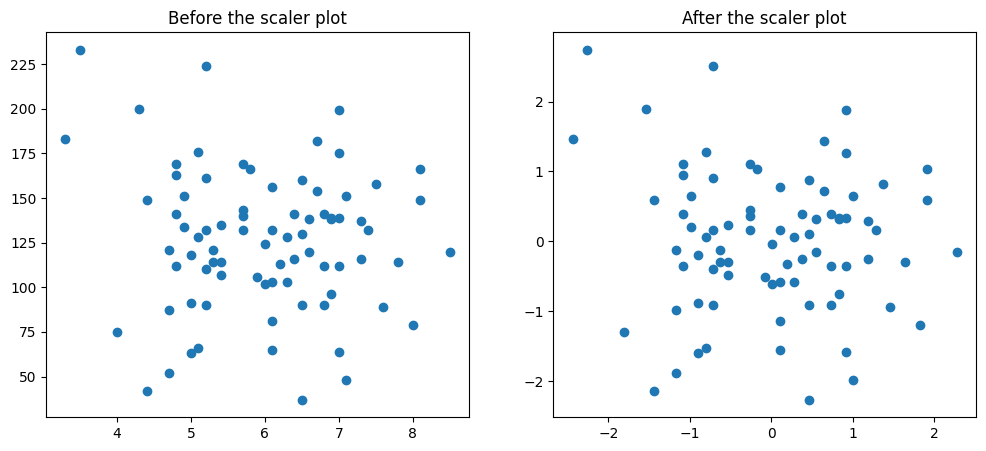

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(X_train['CGPA'],X_train['IQ'])
ax1.set_title("Before the scaler plot")

ax2.scatter(X_train_scaled['CGPA'],X_train_scaled['IQ'])
ax2.set_title("After the scaler plot")
plt.show()

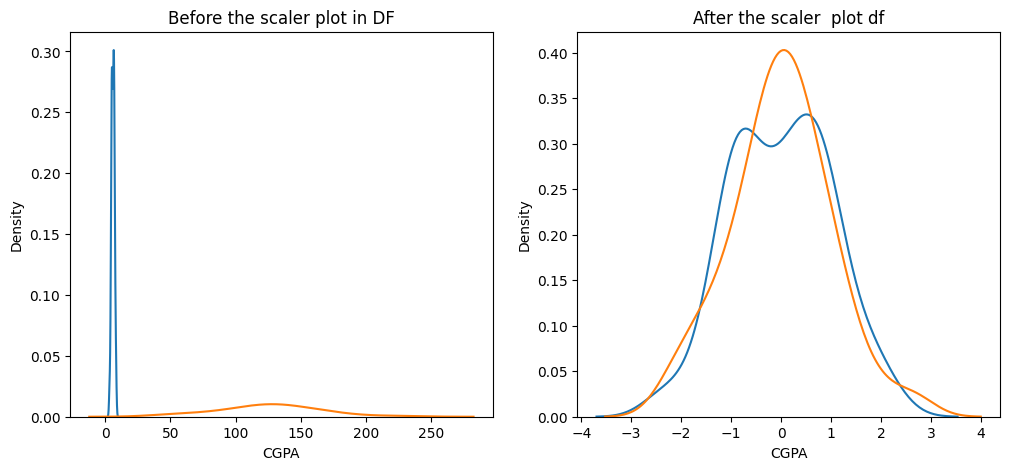

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2 ,figsize=(12,5))

ax1.set_title("Before the scaler plot in DF")
sns.kdeplot(X_train['CGPA'],ax=ax1)
sns.kdeplot(X_train['IQ'],ax = ax1)

ax2.set_title("After the scaler  plot df")
sns.kdeplot(X_train_scaled['CGPA'],ax=ax2)
sns.kdeplot(X_train_scaled['IQ'],ax = ax2)
plt.show()

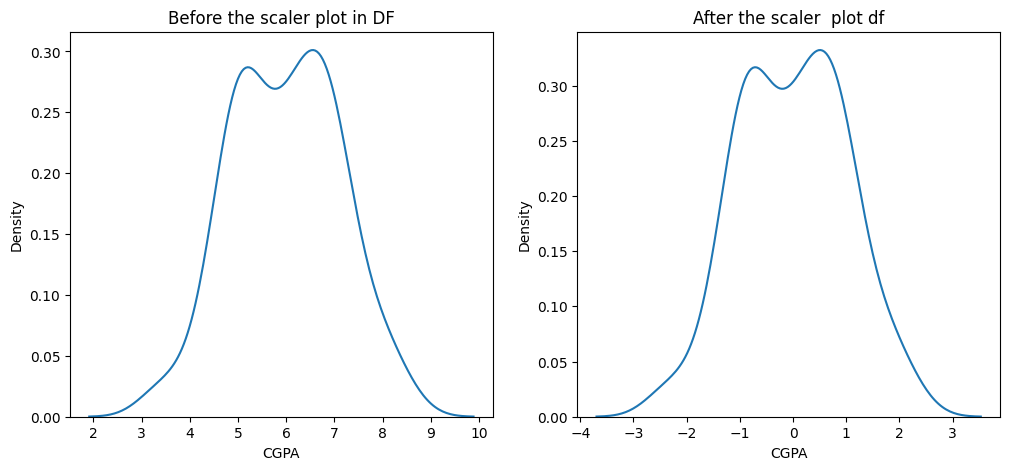

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols=2 ,figsize=(12,5))

ax1.set_title("Before the scaler plot in DF")
sns.kdeplot(X_train['CGPA'],ax=ax1)

ax2.set_title("After the scaler  plot df")
sns.kdeplot(X_train_scaled['CGPA'],ax=ax2)
plt.show()


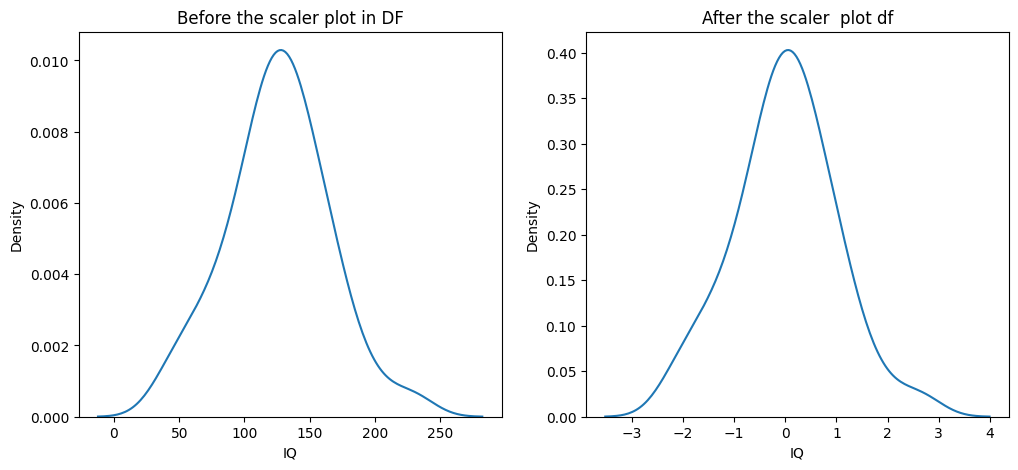

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2 ,figsize=(12,5))

ax1.set_title("Before the scaler plot in DF")
sns.kdeplot(X_train['IQ'],ax = ax1)

ax2.set_title("After the scaler  plot df")
sns.kdeplot(X_train_scaled['IQ'],ax=ax2)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()



In [22]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

print("Actuals",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actuals 0.85
scaled 0.85


In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf_scaled = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf_scaled.fit(X_train_scaled,y_train)


DecisionTreeClassifier()

In [26]:
y_pred = clf.predict(X_test)
y_pred_scaled = clf_scaled.predict(X_test_scaled)

In [27]:
print("actuals",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actuals 0.9
scaled 0.9


In [28]:
df = df.append(pd.DataFrame({"CGPA":[8.9,9.8,9.99],"IQ":[294,349,299],"Placement":[0,1,1]}))

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


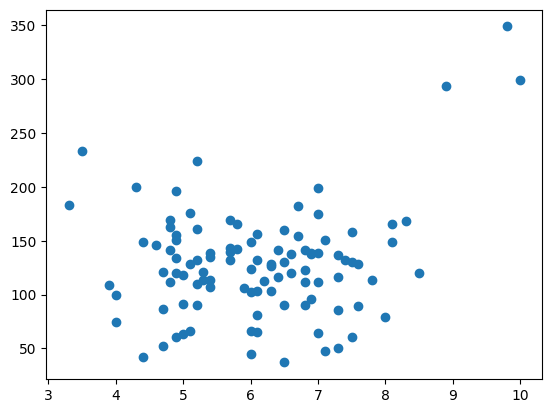

In [ ]:
plt.scatter(df['CGPA'],df['IQ'])

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
std = StandardScaler()

std.fit(X_train)

X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

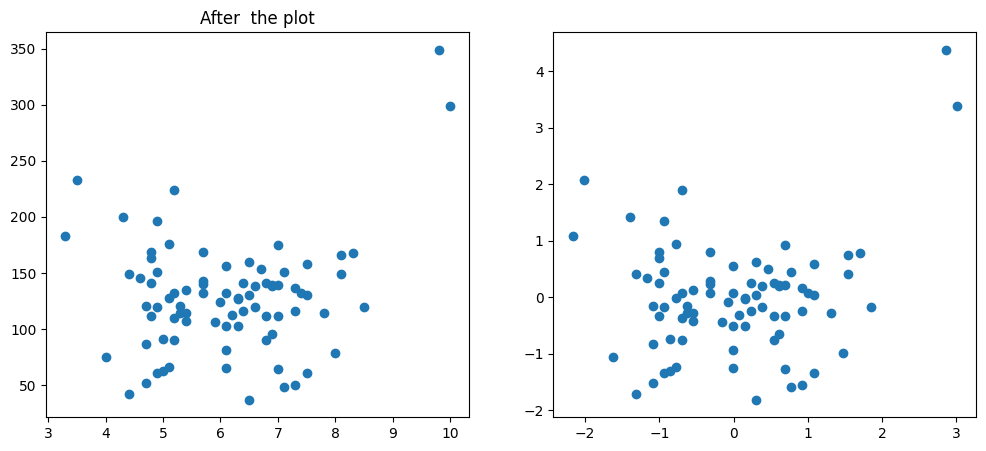

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['CGPA'],X_train['IQ'])
ax1.set_title("Before the plot")

ax2.scatter(X_train_scaled['CGPA'],X_train_scaled['IQ'])
ax1.set_title("After  the plot")
plt.show()